<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/11_Pandas_Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Pandas Explode

Load data.

In [48]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Notes

* `explode()` - transforms each element of a list-like to a row
* Expand list-like data within a DataFrame column into separate rows. 
* Commonly used to split list data into individual rows for analysis (*hint* *hint*) or when working with JSON data in a DataFrame.

## Example

Let's transform the list like elements in the `job_skills` column to a row using the `explode()` function. This will make it so each skill will have its own row and we'll save this into a new DataFrame called `df_exploded`.

In the last section we already prepared our data and we converted our `job_skills` column to a list.

In [49]:
# Convert string representation to actual list, checking for NaN values first
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Data Analyst,"[go, python, mongodb, mongodb, css, javascript..."
1,Data Scientist,"[sql, python, sql server, oracle, azure, sap]"
2,Data Analyst,None
3,Data Engineer,None
4,Data Analyst,"[sql, python, jira]"


Now we're going to apply the `explode()` function onto each skill and make each skill have its own row.

In [50]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode('job_skills')

Let's look at our new column.

In [51]:
df_exploded['job_skills']

0              go
0          python
0         mongodb
0         mongodb
0             css
           ...   
787685        sql
787685      nosql
787685      azure
787685      spark
787685     hadoop
Name: job_skills, Length: 3786926, dtype: object

And now let's visualize it by getting the `value_counts()` of each skill.

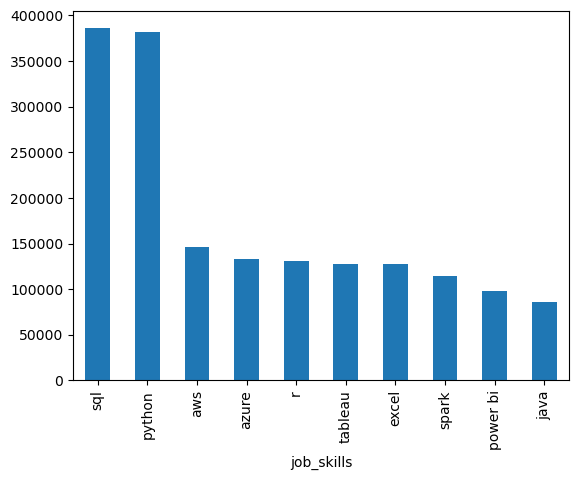

In [52]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()


### Calculate Skill Count

1. Then clean up the skills. We already did this in our last example.

In [54]:
# Explode job_skills column
df_skills = df_skills.explode('job_skills')

2. Now we'll calculate the skill count for each data job.

In [55]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short          
airflow     Business Analyst               319
            Cloud Engineer                 260
            Data Analyst                  2012
            Data Engineer                25556
            Data Scientist                3919
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2257, dtype: int64

3. We'll `reset_index` to transform skills_count from a Series to a DataFrame

In [56]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,319
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2012
3,airflow,Data Engineer,25556
4,airflow,Data Scientist,3919
...,...,...,...
2252,zoom,Machine Learning Engineer,46
2253,zoom,Senior Data Analyst,86
2254,zoom,Senior Data Engineer,122
2255,zoom,Senior Data Scientist,79


4. We'll prep for plotting by the data getting in descending order

In [57]:
df_skills_count.sort_values(by='skill_count',  inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1481,python,Data Scientist,114016
1823,sql,Data Engineer,113375
1480,python,Data Engineer,108265
1822,sql,Data Analyst,92628
1824,sql,Data Scientist,79174
...,...,...,...
193,blazor,Machine Learning Engineer,1
1088,mlr,Machine Learning Engineer,1
226,capacitor,Business Analyst,1
228,capacitor,Data Analyst,1


5. Finally, we'll graph the top 10 skills using a bar chart.

In [58]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
1822,sql,Data Analyst,92628
559,excel,Data Analyst,67031
1479,python,Data Analyst,57326
1942,tableau,Data Analyst,46554
1411,power bi,Data Analyst,39468
1517,r,Data Analyst,30075
1636,sas,Data Analyst,28068
1430,powerpoint,Data Analyst,13848
2199,word,Data Analyst,13591
1626,sap,Data Analyst,11297


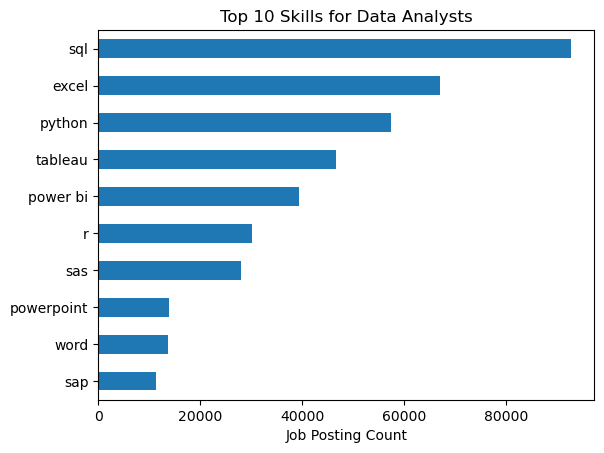

In [63]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()
